In [1]:
import sys
sys.path.insert(1,"../src")
import attention_util
import tensorflow as tf
import gardn_util
import GA_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as tfk
tfkl = tf.keras.layers
import time
print('loaded')

loaded


In [2]:

generator = gardn_util.create_GARDN_utr_generator()

generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 reshape (Reshape)           (None, 1, 1, 128)         0         
                                                                 
 spectral_normalization (Sp  (None, 2, 5, 96)          442592    
 ectralNormalization)                                            
                                                                 
 batch_normalization (Batch  (None, 2, 5, 96)          384       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 2, 5, 96)          0         
                                                                 
 spectral_normalization_1 (  (None, 4, 25, 48)         46224 

In [3]:
discriminator = gardn_util.create_GARDN_utr_discriminator(sequence_length=50)

discriminator.summary()

Model: "discriminator_UTR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 50, 1)]        0         
                                                                 
 spectral_normalization_4 (  (None, 1, 50, 64)         4736      
 SpectralNormalization)                                          
                                                                 
 layer_normalization (Layer  (None, 1, 50, 64)         128       
 Normalization)                                                  
                                                                 
 spectral_normalization_5 (  (None, 1, 50, 32)         18496     
 SpectralNormalization)                                          
                                                                 
 layer_normalization_1 (Lay  (None, 1, 50, 32)         64        
 erNormalization)                                

In [4]:
from datetime import date

today = date.today()
print(today)




designed = np.load('../data/UTR_data/UTR_encoded.npy')
print(designed.shape)

seqs = designed.astype('float32')
seqs = np.expand_dims(seqs,axis=-1)
print(seqs.shape[2])
seq_inputs = tf.data.Dataset.from_tensor_slices(seqs) # convert one-hot arrays to tensor dataset

latent_dim = 128

2024-11-22
(100017, 4, 50)
50


epoch: 0
Step 0
d_loss 3185.7649, gp_loss 3185.8264, g_loss -0.2402
CTGACCCAAAATGAAAGACACGAATCCCGTCGTACCTTCCCGTTGAAGTC
Step 200
d_loss -7.1566, gp_loss 1.0403, g_loss 2.1969
AGGGGGGGGAAAGTTGGTTAAGTGAAATTGAAGGGGGGGTGGGGGGGGGA
Step 400
d_loss -2.1514, gp_loss 0.0473, g_loss 9.1156
ATTAATTCCCAGTCCGAACACGGCCTCTGCCTTCATACAAACCCATAGAC
Step 600
d_loss -2.1951, gp_loss 0.1328, g_loss 3.8414
TTCTGGTTCTTCCGAGTGAGTCCTAGGGCGCTCTAGGGCTTGATAGGAAA
Step 800
d_loss -1.2234, gp_loss 0.0617, g_loss 2.7248
CTTTTTCGTTGGACTTTTTTATTTTGAGTTTTTTTTCATTAATAGTCTTA
Step 1000
d_loss -2.1430, gp_loss 0.2767, g_loss 4.2757
CCGGGTGGGGAAGCCTATGAGCGGTGGTCTTGACGTTCATGAGCTGATTG
Step 1200
d_loss -2.6737, gp_loss 0.3362, g_loss 4.8393
CGGGTGAGAATACGGGATAGCCACTTTTCCGTGTCTGCTTTACAATAACC
Step 1400
d_loss -2.3176, gp_loss 0.2690, g_loss 5.5344
GTTTCTATAGTTTTGATTTAGATGTTAAAATCGGGATGGTAGGAAAAAAA
epoch 1/10 (294.13 sec):, d_loss -2.2225, gp_loss 0.3498, g_loss 5.9090


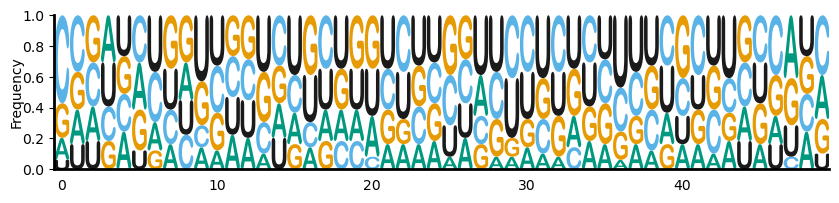

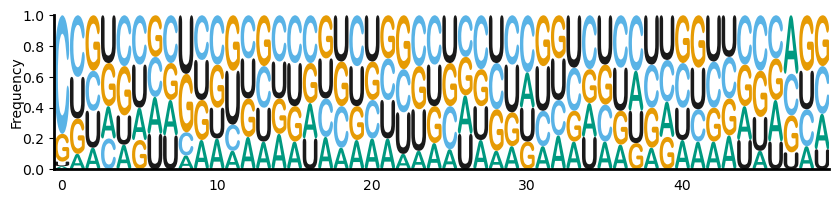

epoch: 1
Step 0
d_loss -2.3944, gp_loss 0.4934, g_loss 6.1507
CTTAGCATTTTTCACAGCAAAATCCTGTTTCCCACTATCCTGTGGGAGAA


KeyboardInterrupt: 

In [5]:
d_loss_save = []
g_loss_save = []
gp_loss_save = []

g_loss_save,d_loss_save,gp_loss_save = gardn_util.train(generator,discriminator,seq_inputs,10,3,64,z_dim=latent_dim,g_loss_save=g_loss_save,d_loss_save=d_loss_save,gp_loss_save=gp_loss_save)

In [10]:
# generator.save('../models/UTR_generator_%s'%(today))
# discriminator_old.save('../UTR_models/discriminator_%s'%(today))

INFO:tensorflow:Assets written to: ../models/generator_2023-04-20/assets


INFO:tensorflow:Assets written to: ../models/generator_2023-04-20/assets


INFO:tensorflow:Assets written to: ../models/discriminator_2023-04-20/assets


INFO:tensorflow:Assets written to: ../models/discriminator_2023-04-20/assets


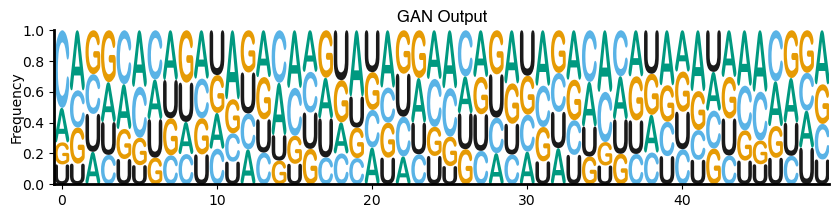

In [25]:
seq_logo_GAN = generator(tf.random.normal((1000,128)))
util.plot_logo(seq_logo_GAN[:,:,:,0],title='GAN Output')